# Implementing the IMPROVING LYRICS ALIGNMENT THROUGH JOINT PITCH DETECTION paper for the Vocadito Dataset

Vocadito : 
* Paper : https://arxiv.org/pdf/2110.05580.pdf
* Dataset : https://zenodo.org/record/5578807 

Algorithm : 
*   Paper : https://arxiv.org/pdf/2202.01646v1.pdf
*   GitHub : https://github.com/jhuang448/lyricsalignment-mtl





## Setup

In [1]:
!git clone https://github.com/jhuang448/LyricsAlignment-MTL.git

Cloning into 'LyricsAlignment-MTL'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 46 (delta 2), reused 2 (delta 2), pack-reused 43
Unpacking objects: 100% (46/46), 112.86 MiB | 5.56 MiB/s, done.
Updating files: 100% (16/16), done.


In [2]:
%cd /content/LyricsAlignment-MTL/
!pip install -r requirements.txt

/content/LyricsAlignment-MTL
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 735.5/735.5 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.5/963.5 KB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.8/136.8 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 75.2 MB/s eta 0:00:

In [3]:
!pip install mirdata
import mirdata
# Downloading the dataset and validating the installation with a CRC check.
vocadito = mirdata.initialize("vocadito")
vocadito.download()
vocadito.validate()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 31.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pretty-midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592303 sha256=7a7185eb0b959817875db23c67bda5b6904657e45bf9aed3c84379fa4385f0f3
  Stored in directory: /root/.cache/pip/wheels/75/ec/20/b8e937a5bcf1de547ea5ce465db7de7f6761e15e6f0a01e25f
  Created wheel for jams: filename=jams-0.3.4-py3-none-any.whl size=64923 sha256=1996a523d29c7e3acd3a177fa6c

55.8MB [00:04, 13.0MB/s]                            
100%|██████████| 40/40 [00:00<00:00, 178.32it/s]


({'metadata': {}, 'tracks': {}}, {'metadata': {}, 'tracks': {}})

In [4]:
!pip install resampy
import resampy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.8 MB/s eta 0:00:00


## Dataset handling

In [5]:
!find /root/mir_datasets/vocadito/Audio/ -name '*.wav' >  /content/pathlist_wav.csv
!find /root/mir_datasets/vocadito/Annotations/Lyrics/ -name '*.txt' >  /content/pathlist_lyrics.csv
!mkdir /content/align_pred

In [6]:
# Goal : having wav_path and lyrics_path : 2 arrays containing the path of the elements
## Not really needed, could be avoided but I have done it so i'm keeping it.

wav_path = []
lyrics_path = []
import re
import csv

with open('/content/pathlist_wav.csv') as fp:
    csvreader = csv.reader(fp)
    for line in csvreader:
        wav_path.append(line[0])

# We do this to sort the files from 1 to 40.
pattern = re.compile(r'vocadito_(\d+)\.wav')
files_with_numbers = [(int(pattern.search(f).group(1)), f) for f in wav_path]
sorted_files_with_numbers = sorted(files_with_numbers, key=lambda x: x[0])
wav_path = [f[1] for f in sorted_files_with_numbers]

with open('/content/pathlist_lyrics.csv') as fp:
    csvreader = csv.reader(fp)
    for line in csvreader:
        lyrics_path.append(line[0])      

# We do this to sort the files from 1 to 40.
pattern = re.compile(r'vocadito_(\d+)\_lyrics.txt')
files_with_numbers = [(int(pattern.search(f).group(1)), f) for f in lyrics_path]
sorted_files_with_numbers = sorted(files_with_numbers, key=lambda x: x[0])
lyrics_path = [f[1] for f in sorted_files_with_numbers]

print(wav_path)
print(lyrics_path)

['/root/mir_datasets/vocadito/Audio/vocadito_1.wav', '/root/mir_datasets/vocadito/Audio/vocadito_2.wav', '/root/mir_datasets/vocadito/Audio/vocadito_3.wav', '/root/mir_datasets/vocadito/Audio/vocadito_4.wav', '/root/mir_datasets/vocadito/Audio/vocadito_5.wav', '/root/mir_datasets/vocadito/Audio/vocadito_6.wav', '/root/mir_datasets/vocadito/Audio/vocadito_7.wav', '/root/mir_datasets/vocadito/Audio/vocadito_8.wav', '/root/mir_datasets/vocadito/Audio/vocadito_9.wav', '/root/mir_datasets/vocadito/Audio/vocadito_10.wav', '/root/mir_datasets/vocadito/Audio/vocadito_11.wav', '/root/mir_datasets/vocadito/Audio/vocadito_12.wav', '/root/mir_datasets/vocadito/Audio/vocadito_13.wav', '/root/mir_datasets/vocadito/Audio/vocadito_14.wav', '/root/mir_datasets/vocadito/Audio/vocadito_15.wav', '/root/mir_datasets/vocadito/Audio/vocadito_16.wav', '/root/mir_datasets/vocadito/Audio/vocadito_17.wav', '/root/mir_datasets/vocadito/Audio/vocadito_18.wav', '/root/mir_datasets/vocadito/Audio/vocadito_19.wav', '

In [7]:
# Function doing the steps described in https://github.com/jhuang448/LyricsAlignment-MTL/blob/main/example.ipynb, 
from wrapper import align, preprocess_from_file, write_csv

def apply_algo(audio_file, lyrics_file, word_file, pred_file, method):

  # words:        a list of words
  # lyrics_p:     phoneme sequence of the target lyrics
  # idx_word_p:   indices of word start in lyrics_p
  # idx_line_p:   indices of line start in lyrics_p
  audio, words, lyrics_p, idx_word_p, idx_line_p = preprocess_from_file(audio_file, lyrics_file, word_file)

  # compute alignment
  # word_align:   a list of frame indices aligned to each word
  # words:        a list of words
  word_align, words = align(audio, words, lyrics_p, idx_word_p, idx_line_p, method=method, cuda=False)

  # write to csv
  write_csv(pred_file, word_align, words)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


In [8]:
# Going through every file
for i in range(len(wav_path)):
  print(f'Actually working on extract n°{i+1} - {i/40*100}% finished')
  apply_algo(audio_file = wav_path[i], lyrics_file = lyrics_path[i], word_file = None, pred_file = f'/content/align_pred/pred_vocadito_{i+1}.csv', method = "MTL" )
  print('-----\n')

print('100% Finished')

Actually working on extract n°1 - 0.0% finished
Model: MTL BDR?: False
Loading acoustic model from checkpoint...
Computing phoneme posteriorgram...
Aligning...It might take a few minutes...
Alignment Score:	-494.27145094160517	Time:	5.364293336868286
-----

Actually working on extract n°2 - 2.5% finished
Model: MTL BDR?: False
Loading acoustic model from checkpoint...
Computing phoneme posteriorgram...
Aligning...It might take a few minutes...
Alignment Score:	-350.93935170704714	Time:	2.684269666671753
-----

Actually working on extract n°3 - 5.0% finished
Model: MTL BDR?: False
Loading acoustic model from checkpoint...
Computing phoneme posteriorgram...
Aligning...It might take a few minutes...
Alignment Score:	-410.37099453363794	Time:	1.7947237491607666
-----

Actually working on extract n°4 - 7.5% finished
Model: MTL BDR?: False
Loading acoustic model from checkpoint...
Computing phoneme posteriorgram...
Aligning...It might take a few minutes...
Alignment Score:	-457.5520022707266

In [9]:
!head /content/align_pred/pred_vocadito_1.csv

0.626938775510204,1.1145578231292517,ako
1.219047619047619,1.6370068027210884,ay
1.7066666666666666,2.1942857142857144,may
2.2291156462585033,3.7268027210884354,lobo
3.7964625850340137,4.806530612244898,lumipad
4.876190476190476,5.363809523809524,sa
5.3986394557823125,6.791836734693877,langit
6.861496598639455,7.174965986394557,di
7.209795918367346,7.349115646258503,ko
7.383945578231292,7.836734693877551,na


## 'Accuracy metric'

In [20]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def calculate_onsets(number):
  y, sr = librosa.load(f'/root/mir_datasets/vocadito/Audio/vocadito_{number}.wav')
  librosa.onset.onset_detect(y=y, sr=sr, units='time')
  o_env = librosa.onset.onset_strength(y=y, sr=sr)
  times = librosa.times_like(o_env, sr=sr)
  onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

  return list(librosa.frames_to_time(onset_frames))

def improving_onsets(number):
  timing = []

  with open(f'/content/align_pred/pred_vocadito_{number}.csv') as fp:
    csvreader = csv.reader(fp)
    for line in csvreader:
      timing.append(float(line[0]))

  onsets = calculate_onsets(number)
  onsets_improved = []
  for t in timing:
    tmp_a = []
    for o in onsets:
      tmp_a.append(abs(t-o))
    if(min(tmp_a) <= 1): #Inf a 1s
      onsets_improved.append(onsets[np.argmin(tmp_a)])

  return(onsets_improved, timing)

def calculate_metric(number):
  (onsets_improved, timing) = improving_onsets(number)

  tmp = 0
  ouch = 0
  total = 0
  #print(f'len timing : {len(timing)} ; len onsets_improved : {len(onsets_improved)}')
  for i in range(min(len(timing),len(onsets_improved))):
    total += 1
    tmp_ = abs(timing[i]-onsets_improved[i])
    tmp += tmp_
    if tmp_ > 0.3: #300 ms accu 
      ouch += 1

  return (tmp/len(timing),ouch,total)


In [15]:
calculate_metric(6)

(0.07127236079617048, 3, 36)

In [16]:
# We apply for every file :

mean_ms = []
ouch_overall = []
total_overall = []
f0_indiv = []

for i in range(40):
  print(f'Processing file n°{i+1} - {(i+1)/40*100}% done so far')
  (out1, out2, out3) = calculate_metric(i+1)
  print(f'Mean accuracy (ms) : {out1*1000} - F0-score with 0.3s tolerance : {100-out2/out3*100}')
  mean_ms.append(out1*1000)
  ouch_overall.append(out2)
  total_overall.append(out3)
  f0_indiv.append(100-out2/out3*100)
  print('---')

print('Processing finished !')

Processing file n°1 - 2.5% done so far
Mean accuracy (ms) : 33.774479488765145 - F0-score with 0.3s tolerance : 100.0
---
Processing file n°2 - 5.0% done so far
Mean accuracy (ms) : 42.56991685563124 - F0-score with 0.3s tolerance : 100.0
---
Processing file n°3 - 7.5% done so far
Mean accuracy (ms) : 38.69992441421033 - F0-score with 0.3s tolerance : 100.0
---
Processing file n°4 - 10.0% done so far
Mean accuracy (ms) : 35.918367346938766 - F0-score with 0.3s tolerance : 96.875
---
Processing file n°5 - 12.5% done so far
Mean accuracy (ms) : 46.4399092970521 - F0-score with 0.3s tolerance : 100.0
---
Processing file n°6 - 15.0% done so far
Mean accuracy (ms) : 71.27236079617049 - F0-score with 0.3s tolerance : 91.66666666666667
---
Processing file n°7 - 17.5% done so far
Mean accuracy (ms) : 29.024943310657484 - F0-score with 0.3s tolerance : 100.0
---
Processing file n°8 - 20.0% done so far
Mean accuracy (ms) : 36.11992945326278 - F0-score with 0.3s tolerance : 100.0
---
Processing f

We have the following metrics :
   Mean difference between calculated between onsets and beginning of the word (in ms) : 105.79989907926972
   Variance related : 126614.94805634713
   Minimum value : 19.349962207104994 for the track n°29
   Maximum value : 2322.6404635928448 for the track n°17

   Mean F0-score with 0.3s tolerance - Global : 95.92476489028213%
   Mean F0-score with 0.3s tolerance - Individuals : 95.60031312997795%
   Variance related : 232.70069170134929
   Minimum value : 3.3333333333333286 for the track n°17
   Maximum value : 100.0 for the track n°1


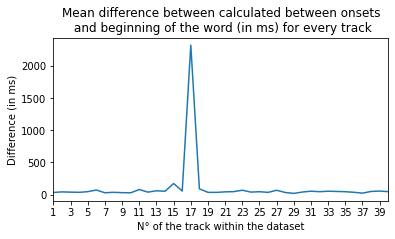

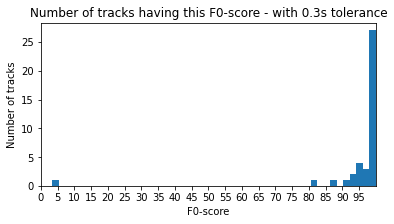

In [21]:
plt.rcParams['figure.figsize'] = (6,3)
plt.figure()
plt.plot(np.arange(1,41),mean_ms)
plt.xlabel('N° of the track within the dataset')
plt.ylabel('Difference (in ms)')
plt.title('Mean difference between calculated between onsets\n and beginning of the word (in ms) for every track')
plt.xlim(1,40)

plt.xticks(np.arange(1,41)[::2])

plt.figure()
plt.hist(f0_indiv,50)
plt.xlabel('F0-score')
plt.ylabel('Number of tracks')
plt.title('Number of tracks having this F0-score - with 0.3s tolerance')
plt.xlim(20,100)
plt.xticks(np.arange(100)[::5])

# 1st metric : mean ms_delay
# mean ; var ; ...
print('We have the following metrics :')
print(f'   Mean difference between calculated between onsets and beginning of the word (in ms) : {np.mean(mean_ms)}')
print(f'   Variance related : {np.var(mean_ms)}')
print(f'   Minimum value : {min(mean_ms)} for the track n°{np.argmin(mean_ms)+1}')
print(f'   Maximum value : {max(mean_ms)} for the track n°{np.argmax(mean_ms)+1}')

print('')

# 2nd metric : F0-score for individual ; min & max for indiv ; total err out of total 
print(f'   Mean F0-score with 0.3s tolerance - Global : {100 - np.sum(ouch_overall)/np.sum(total_overall)*100}%')
print(f'   Mean F0-score with 0.3s tolerance - Individuals : {np.mean(f0_indiv)}%')
print(f'   Variance related : {np.var(f0_indiv)}')
print(f'   Minimum value : {min(f0_indiv)} for the track n°{np.argmin(f0_indiv)+1}')
print(f'   Maximum value : {max(f0_indiv)} for the track n°{np.argmax(f0_indiv)+1}')


In [26]:
# Issue with the 17th element - outliers

mean_ms.pop(16)
ouch_overall.pop(16)
total_overall.pop(16)
f0_indiv.pop(16)

3.3333333333333286

In [27]:

# 1st metric : mean ms_delay
# mean ; var ; ...
print('We have the following metrics :')
print(f'   Mean difference between calculated between onsets and beginning of the word (in ms) : {np.mean(mean_ms)}')
print(f'   Variance related : {np.var(mean_ms)}')
print(f'   Minimum value : {min(mean_ms)} for the track n°{np.argmin(mean_ms)+2}')
print(f'   Maximum value : {max(mean_ms)} for the track n°{np.argmax(mean_ms)+2}')
#plot histo

print('')

# 2nd metric : F0-score for individual ; min & max for indiv ; total err out of total 
print(f'   Mean F0-score with 0.3s tolerance - Global : {100 - np.sum(ouch_overall)/np.sum(total_overall)*100}%')
print(f'   Mean F0-score with 0.3s tolerance - Individuals : {np.mean(f0_indiv)}%')
print(f'   Variance related : {np.var(f0_indiv)}')
print(f'   Minimum value : {min(f0_indiv)} for the track n°{np.argmin(f0_indiv)+2}')
print(f'   Maximum value : {max(f0_indiv)} for the track n°{np.argmax(f0_indiv)+2}')

We have the following metrics :
   Mean difference between calculated between onsets and beginning of the word (in ms) : 48.95783332251139
   Variance related : 620.6676061715112
   Minimum value : 19.349962207104994 for the track n°29
   Maximum value : 172.90573372206018 for the track n°16

   Mean F0-score with 0.3s tolerance - Global : 98.15409309791332%
   Mean F0-score with 0.3s tolerance - Individuals : 97.9661331247637%
   Variance related : 14.783206194824341
   Minimum value : 82.14285714285714 for the track n°16
   Maximum value : 100.0 for the track n°2


## Plotting

In [18]:
import matplotlib.pyplot as plt
import matplotlib
import csv
from matplotlib.patches import Rectangle
import numpy as np

In [19]:
def plotting_pred(number, starting_time, finish_time):
  wav_path = f'/root/mir_datasets/vocadito/Audio/vocadito_{number}.wav'
  F0_path = f'/root/mir_datasets/vocadito/Annotations/F0/vocadito_{number}_f0.csv'
  lyrics_path = f'/root/mir_datasets/vocadito/Annotations/Lyrics_process/vocadito_{number}.txt'
  notes_a1_path = f'/root/mir_datasets/vocadito/Annotations/Notes/vocadito_{number}_notesA1.csv'
  notes_a2_path = f'/root/mir_datasets/vocadito/Annotations/Notes/vocadito_{number}_notesA2.csv'
  words_onsets_path = f'/content/align_pred/pred_vocadito_{number}.csv'

  time_ind = []
  f0_ind = []

  time_a1_ind = []
  dur_a1_ind = []
  pitch_a1 = []

  time_a2_ind = []
  dur_a2_ind = []
  pitch_a2 = []

  word = []
  timing_start = []
  timing_end = []

  with open(F0_path) as fp:
      csvreader = csv.reader(fp)
      for line in csvreader:
          time_ind.append(float(line[0]))
          f0_ind.append(float(line[1]))

  with open(notes_a1_path) as fp:
      csvreader = csv.reader(fp)
      for line in csvreader:
          time_a1_ind.append(float(line[0]))
          pitch_a1.append(float(line[1]))
          dur_a1_ind.append(float(line[2])) 

  with open(notes_a2_path) as fp:
      csvreader = csv.reader(fp)
      for line in csvreader:
          time_a2_ind.append(float(line[0]))
          pitch_a2.append(float(line[1]))
          dur_a2_ind.append(float(line[2]))


  with open(words_onsets_path) as fp:
      csvreader = csv.reader(fp)
      for line in csvreader:
        timing_start.append(float(line[0]))
        timing_end.append(float(line[1]))
        word.append(line[2])

  # Onsets from Librosa :
  (onsets_librosa,_) = improving_onsets(number)

  plt.rcParams['figure.figsize'] = (20,8)

  fig, ax = plt.subplots()

  for i in range(len(time_a1_ind)):
    if time_a1_ind[i] > starting_time and time_a1_ind[i] < finish_time:
      ax.add_patch(Rectangle((time_a1_ind[i],pitch_a1[i]-5), dur_a1_ind[i], 10, alpha=0.2, facecolor='b'))

  for i in range(len(time_a2_ind)):
    if time_a2_ind[i] > starting_time and time_a2_ind[i] < finish_time:
      ax.add_patch(Rectangle((time_a2_ind[i],pitch_a2[i]-5), dur_a2_ind[i], 10, alpha=0.2, facecolor='r'))

  tmp = min(x for x in f0_ind if x != 0) - 50
  for i in range(len(word)):
    if timing_start[i] > starting_time and timing_start[i] < finish_time :
      ax.text(timing_start[i], tmp, f'{word[i]}', size=30)
      plt.axvline(x=timing_start[i], alpha = 0.5,c='darkred',ls='--')
      plt.axvline(x=timing_end[i], alpha = 0.4,c='indianred',ls='dotted')
      if timing_end[i]<finish_time+2:
        ax.add_patch(Rectangle((timing_start[i],tmp-2), abs(timing_start[i]-timing_end[i]), 20, alpha=0.2, facecolor='g'))

  for i in range(len(f0_ind)):
    if(time_ind[i] > starting_time and time_ind[i] < finish_time):
      if f0_ind[i] > 10:
        ax.plot(time_ind[i], f0_ind[i],'ok',alpha = 0.4)
      else:
        ax.plot(time_ind[i], 100)

  for o in onsets_librosa:
    if( o > starting_time and o < finish_time ):
      plt.axvline(x=o, alpha = 0.5,c='darkgreen',ls='--')

  plt.xlim(xmin=starting_time, xmax=finish_time)
  plt.ylim(ymin=tmp - 70, ymax = max(f0_ind)+20)

  #Legend
  plt.axvline(x=-1, alpha = 0.5, c='darkred', ls='--', label = 'Beginning on a word')
  plt.axvline(x=-1, alpha = 0.4, c='indianred',ls='dotted', label = 'End of a word')
  ax.plot(-1, 0,'ok',alpha = 0.4, label='A pitch value')
  ax.add_patch(Rectangle((-1,0), 0, 0, alpha=0.2, facecolor='b', label = 'Annotations from A1'))
  ax.add_patch(Rectangle((-1,0), 0, 0, alpha=0.2, facecolor='r', label = 'Annotations from A2'))
  plt.axvline(x=-1, alpha = 0.5,c='darkgreen',ls='--', label = 'Onset from Librosa')

  plt.legend()
  plt.xlabel('Time (sec)')
  plt.ylabel('Pitch (frequency)')

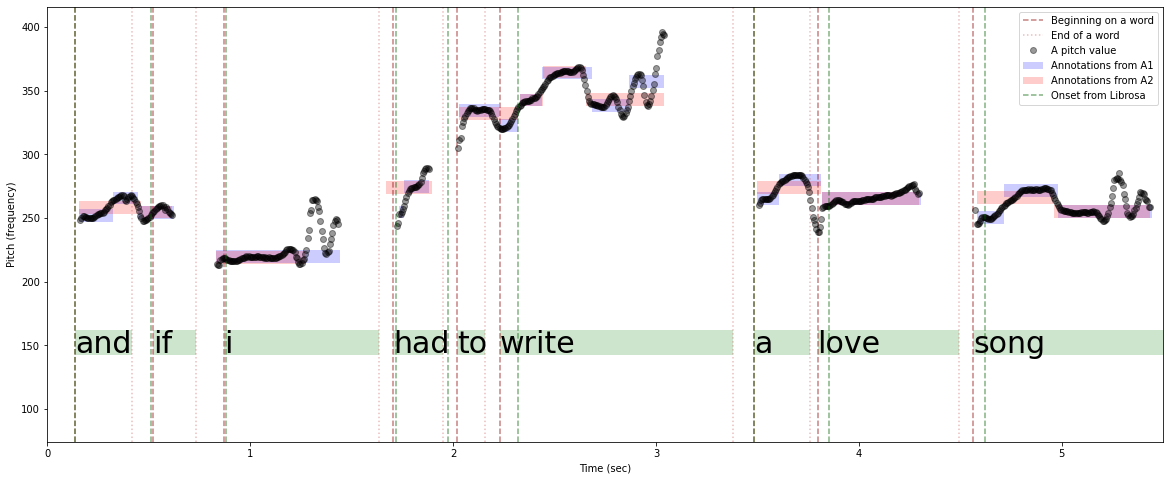

In [23]:
plotting_pred(number = 6,starting_time = 0, finish_time = 5.5)

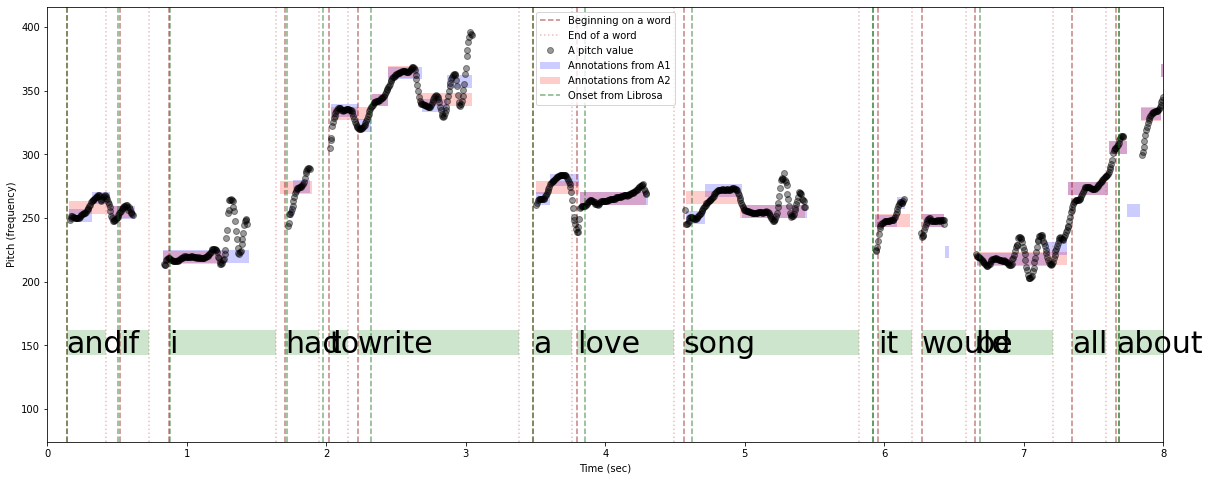

In [24]:
plotting_pred(number = 6,starting_time = 0, finish_time = 8)

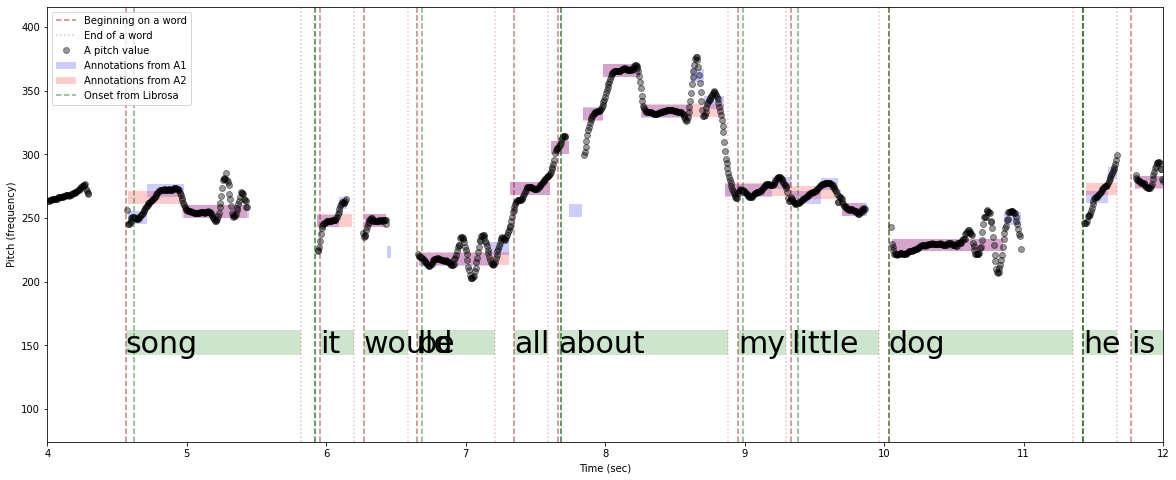

In [25]:
plotting_pred(number = 6,starting_time = 4, finish_time = 12)

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


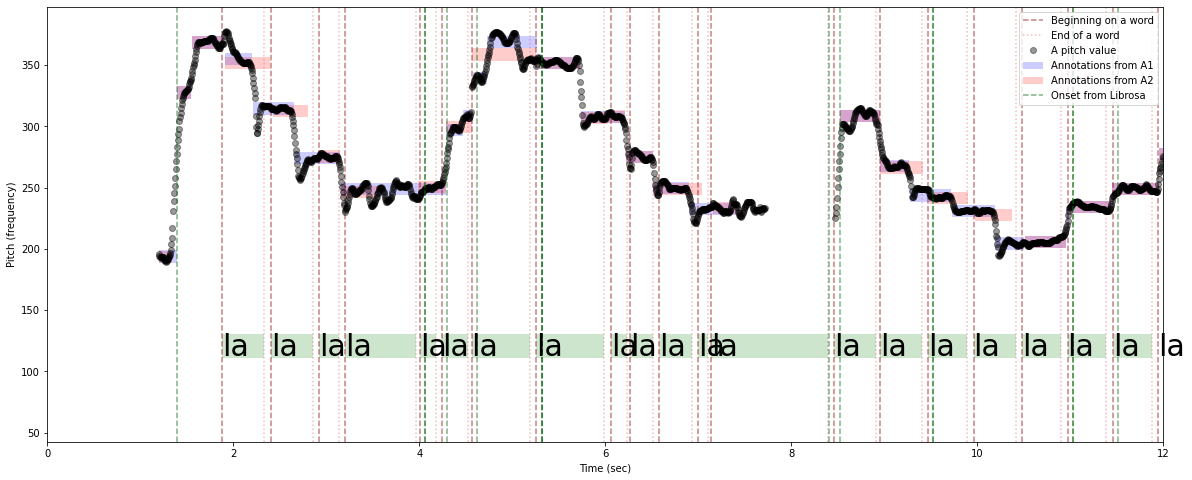

In [22]:
plotting_pred(number = 17, starting_time = 0, finish_time = 12)